# What is Folium?

So the million-dollar question first – what in the world is Folium?

Folium is a Python library used for visualizing geospatial data. It is easy to use and yet a powerful library. Python Folium is wrapper for [Leaflet.js](https://leafletjs.com/) which is a leading open-source JavaScript library for plotting interactive maps.

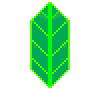

Folium combines the power of Leaflet.js with the simplicity of Python, making it an excellent tool for plotting maps. It is designed with simplicity, performance, and usability in mind. Folium works efficiently, can be extended with many plugins, and has a beautiful and easy-to-use API.

# Installing Folium on our Machine

Folium comes installed on Google Colab and Kaggle kernels. But, if you don’t have Folium installed by default on your system, you can install it using the following command:

``` pip install folium ```

Right, let’s start plotting maps!

# Plotting Maps with Folium

Plotting maps with Folium is easier than you think. Folium provides the `folium.Map()` class, which takes location parameters in terms of latitude and longitude and generates a map around it. So, let’s plot a map of **Cairo** with latitude and longitude as 30.0444 and 31.2357, respectively:

In [2]:
import folium
m = folium.Map(location=[30.0444, 31.2357])
m

These interactive maps can be zoomed in and out by clicking the positive and negative buttons in the top-left corner. You can also drag the map to see different regions.

Let’s try to customize this map now. First, we’ll reduce its height and width, and then we’ll change the zoom level.

We can use `Folium` Figure class for resizing our maps and pass the desired width and height in pixels:

In [3]:
from folium import Map, Figure
fig = Figure(width=500, height=800)

Next, let’s move to our second problem and change the zoom level. By default, you can zoom in and out as much as you want. However, the starting zoom level is fixed to 10 (the map is plotted with a 10x zoom). Now, you might be thinking—how can this be a problem?

Well, imagine you want to plot a map of a small area. Here, you need to mention the appropriate starting zoom level so that the map focuses only on that region. Also, if you don’t want them to zoom in or out much and lose focus on the map, you can restrict it. Folium Map gives us three parameters for doing this: zoom_start, min_zoom, and max_zoom.

So, let us again plot the map of Delhi but this time of fixed size and with a restricted zoom level:

In [4]:
m1 = folium.Map(width=500, height=800, location=[30.0444, 31.2357], zoom_start=11, min_zoom=8, max_zoom=14)
fig.add_child(m1)
m1

You can see here that I cannot zoom in and out after a certain level. Notice that you need to pass the map as a child to the fig object to resize it.

# Layers and Tiles in Folium

A tileset is a collection of raster and vector data broken up into a uniform grid of square tiles. Each tileset represents data differently in the map. Folium allows us to create maps with different tiles, such as Stamen Terrain, Stamen Toner, Stamen Water Color, CartoDB Positron, and many more. By default, the tiles are set to [OpenStreetMap](https://www.openstreetmap.org/#map=6/26.81/30.25).

Each [tileset](https://python-visualization.github.io/folium/latest/reference.html) shows different features of a map and is suitable for different purposes.

Since now we know that each tileset provides information in a different way and serves a different purpose, we can layer them over one another to get more information by just plotting a single map. We can do this by adding different layers of tiles to a single map:

In [5]:
import folium
from folium import Map, Figure

# Create a figure with a specified size
fig2 = Figure(width=500, height=300)

# Create a map centered at the given coordinates
m2 = folium.Map(location=[30.0444, 31.2357])

# Add the map to the figure
m2.add_to(fig2)

# Add different tile layers to the map with attribution where necessary
folium.TileLayer('CartoDB Positron', attr='Map tiles by Stamen Design').add_to(m2)
folium.TileLayer('CartoDB Voyager', attr='Map tiles by Stamen Design').add_to(m2)
folium.TileLayer('OpenTopoMap', attr='Map tiles by CartoDB').add_to(m2)
folium.TileLayer('Stadia.StamenWatercolor', attr='Map tiles by CartoDB').add_to(m2)
folium.TileLayer('OpenStreetMap.Mapnik', attr='Map tiles by Stamen Design').add_to(m2)

# Add layer control to switch between the different layers
folium.LayerControl().add_to(m2)

# Display the map
m2

Here, you can see that I have added different tile layers to a single map. I have also added LayerControl() to the map, which provides an icon at the top-right corner for switching between the different layers.

We can also layer other objects over a single map. Later in this article, we’ll layer paths of three different vehicles on a single map.

# Plotting Markers on the Map

Markers are the items used for marking a location on a map. For example, when you use Google Maps for navigation, your location is marked by a marker and your destination is marked by another marker. Markers are among the most important and helpful things on a map.

Folium Python gives a folium. The Marker() class is for plotting markers on a map. Just pass the location’s latitude and longitude, mention the popup and tooltip, and add it to the map.

Plotting markers is a two-step process. First, you need to create a base map on which your markers will be placed, and then add your markers to it:

In [6]:
# Creating Basemap
fig3 = Figure(width=500, height=300)
m3 = folium.Map(location=[30.0444, 31.2357], tiles='cartodbpositron', zoom_start=11)
fig3.add_child(m3)

#Adding markers to the map
folium.Marker(location=[30.0444, 31.2357], popup='Cairo', tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[29.9773, 31.1325], popup='<strong>Giza Pyramids</strong>', tooltip='<strong>Click here to see Popup</strong>').add_to(m3)

m3

Here, I have created two markers on the Cairo map. The text when you hover over a marker is known as a tooltip, and the content when you click on a marker is known as a popup. If you look closely here, you will see that I have customized the tooltips and popups of markers 2 and 3. You can also customize them according to your needs by passing the content as HTML to the class.

Now, normally when we book a ride on Uber, we see very different and beautiful markers. How can we create something like that?

You can customize two things to change a marker’s appearance: its icon and shape. Folium gives the folium.Icon() class, which can be used to create custom icons for markers. You can choose icons from a wide range of options.

`Icon()` takes three arguments: color, prefix, and icon. Color is used to change the marker’s color, the prefix is used to select the icon provider (fa for Fontawesome and glyphicon for Glyphicons), and the icon is used to select the icon name.

Now, let’s learn how you can change the shape of the marker. Folium map has the `folium.features.CustomIcon()` class that can be used for creating custom markers. It takes the path of the image and icon size in pixels as arguments and creates an icon object. This icon object can be passed to the `folium.Icon()` class as an icon for creating custom markers:

In [8]:
# Creating Basemap
fig4 = Figure(height=300, width=500)
m4 = folium.Map(location=[30.0444, 31.2357], tiles='cartodbpositron', zoom_start=11)
fig4.add_child(m4)

# Adding Custom Markers
folium.Marker(location=[30.0444, 31.2357], popup='Cairo', tooltip='<strong>Click here to see Popup</strong>', icon = folium.Icon(color='red', icon='none')).add_to(m4)
folium.Marker(location=[29.9773, 31.1325],popup='<strong>Giza Pyramids</strong>',tooltip='<strong>Click here to see Popup</strong>', icon=folium.Icon(color='purple', prefix='fa', icon='star')).add_to(m4)

m4

# Plotting Paths using Folium Python

We'll plot the path of a vehicle on the Folium map. We have an arrays for the vehicles containing latitudes and longitudes of its paths and Geospatial Analysis using Folium:

Get the path from: [Google Maps](https://www.google.com/maps/d/)

In [9]:
path_1 = [
    [30.04427, 31.23528],
    [30.04426, 31.23529],
    [30.04424, 31.2353],
    [30.04423, 31.23531],
    [30.04422, 31.23531],
    [30.04421, 31.23532],
    [30.0442, 31.23533],
    [30.04419, 31.23534],
    [30.04417, 31.23536],
    [30.04413, 31.23541],
    [30.04408, 31.23547],
    [30.04405, 31.23555],
    [30.04403, 31.23563],
    [30.04403, 31.23571],
    [30.04403, 31.23579],
    [30.04405, 31.23587],
    [30.04408, 31.23595],
    [30.04412, 31.236],
    [30.04416, 31.23606],
    [30.04418, 31.23607],
    [30.0442, 31.23609],
    [30.04421, 31.2361],
    [30.04423, 31.23612],
    [30.04425, 31.23613],
    [30.04427, 31.23614],
    [30.04431, 31.23615],
    [30.04435, 31.23617],
    [30.04442, 31.23617],
    [30.04448, 31.23617],
    [30.04454, 31.23616],
    [30.0446, 31.23613],
    [30.04465, 31.2361],
    [30.0447, 31.23605],
    [30.04474, 31.236],
    [30.04478, 31.23593],
    [30.04481, 31.23585],
    [30.04483, 31.23577],
    [30.04483, 31.23569],
    [30.04482, 31.23561],
    [30.0448, 31.23553],
    [30.04477, 31.23546],
    [30.04472, 31.23539],
    [30.04464, 31.23531],
    [30.04463, 31.23531],
    [30.04462, 31.2353],
    [30.0446, 31.23529],
    [30.04459, 31.23529],
    [30.04458, 31.23528],
    [30.04457, 31.23527],
    [30.04455, 31.23527],
    [30.04454, 31.23527],
    [30.04445, 31.2348],
    [30.04442, 31.23457],
    [30.0444, 31.23437],
    [30.04437, 31.23412],
    [30.04431, 31.23375],
    [30.04421, 31.23314],
    [30.04418, 31.23293],
    [30.04405, 31.2321],
    [30.04403, 31.23201],
    [30.04403, 31.23199],
    [30.04403, 31.23195],
    [30.04401, 31.23186],
    [30.04401, 31.23184],
    [30.04401, 31.23182],
    [30.044, 31.23175],
    [30.044, 31.23168],
    [30.04398, 31.23148],
    [30.04398, 31.23147],
    [30.04397, 31.23142],
    [30.04395, 31.23121],
    [30.04393, 31.23101],
    [30.04391, 31.2308],
    [30.04388, 31.23045],
    [30.04383, 31.22997],
    [30.04381, 31.22979],
    [30.04373, 31.22915],
    [30.04373, 31.22911],
    [30.0437, 31.22895],
    [30.04368, 31.22874],
    [30.04365, 31.22853],
    [30.04357, 31.22792],
    [30.04357, 31.22791],
    [30.04351, 31.22749],
    [30.04348, 31.2273],
    [30.0435, 31.22729],
    [30.04351, 31.22728],
    [30.04352, 31.22727],
    [30.04354, 31.22726],
    [30.04355, 31.22725],
    [30.04356, 31.22724],
    [30.04357, 31.22722],
    [30.04358, 31.22721],
    [30.04359, 31.22719],
    [30.04359, 31.22718],
    [30.0436, 31.22716],
    [30.0436, 31.22714],
    [30.04361, 31.22712],
    [30.04361, 31.2271],
    [30.04361, 31.22708],
    [30.04361, 31.22706],
    [30.04361, 31.22705],
    [30.0436, 31.22703],
    [30.0436, 31.22701],
    [30.04359, 31.22699],
    [30.04358, 31.22697],
    [30.04357, 31.22696],
    [30.04356, 31.22694],
    [30.04355, 31.22693],
    [30.04354, 31.22691],
    [30.04352, 31.2269],
    [30.04351, 31.22689],
    [30.0435, 31.22688],
    [30.04348, 31.22687],
    [30.04346, 31.22687],
    [30.04345, 31.22686],
    [30.04341, 31.22686],
    [30.0434, 31.22686],
    [30.04339, 31.22686],
    [30.04338, 31.22686],
    [30.04337, 31.22686],
    [30.04336, 31.22686],
    [30.04335, 31.22687],
    [30.04334, 31.22687],
    [30.04333, 31.22687],
    [30.04306, 31.22644],
    [30.04276, 31.22593],
    [30.04235, 31.22523],
    [30.04226, 31.22506],
    [30.04206, 31.22472],
    [30.04177, 31.2242],
    [30.04075, 31.22242],
    [30.0405, 31.22173],
    [30.04044, 31.22145],
    [30.04039, 31.22123],
    [30.04036, 31.22101],
    [30.0403, 31.22077],
    [30.04026, 31.2206],
    [30.0402, 31.2204],
    [30.04018, 31.22032],
    [30.04018, 31.22021],
    [30.04017, 31.22014],
    [30.04017, 31.22009],
    [30.04018, 31.22004],
    [30.0402, 31.21983],
    [30.04021, 31.21981],
    [30.04022, 31.21979],
    [30.04023, 31.21976],
    [30.04024, 31.21973],
    [30.04025, 31.21971],
    [30.04026, 31.21968],
    [30.04026, 31.21965],
    [30.04026, 31.21962],
    [30.04026, 31.21959],
    [30.04025, 31.21955],
    [30.04025, 31.21952],
    [30.04024, 31.21949],
    [30.04022, 31.21946],
    [30.04021, 31.21944],
    [30.0402, 31.21942],
    [30.04018, 31.21941],
    [30.04017, 31.21939],
    [30.04016, 31.21938],
    [30.04015, 31.21937],
    [30.04014, 31.21937],
    [30.04013, 31.21936],
    [30.04013, 31.21936],
    [30.04012, 31.21936],
    [30.04012, 31.21936],
    [30.04012, 31.21937],
    [30.04011, 31.21938],
    [30.04011, 31.21939],
    [30.0401, 31.21941],
    [30.0401, 31.21942],
    [30.04009, 31.21944],
    [30.04009, 31.21945],
    [30.04008, 31.21946],
    [30.04007, 31.21947],
    [30.04007, 31.21948],
    [30.04006, 31.21949],
    [30.04005, 31.2195],
    [30.04004, 31.21951],
    [30.04003, 31.21951],
    [30.04002, 31.21952],
    [30.04001, 31.21953],
    [30.04, 31.21953],
    [30.03999, 31.21954],
    [30.03998, 31.21955],
    [30.03997, 31.21955],
    [30.03997, 31.21956],
    [30.03996, 31.21956],
    [30.03995, 31.21957],
    [30.03995, 31.21957],
    [30.03994, 31.21957],
    [30.03994, 31.21957],
    [30.03993, 31.21957],
    [30.03993, 31.21957],
    [30.03993, 31.21957],
    [30.03992, 31.21957],
    [30.03992, 31.21957],
    [30.03992, 31.21956],
    [30.03992, 31.21956],
    [30.03992, 31.21955],
    [30.03992, 31.21955],
    [30.03992, 31.21954],
    [30.03991, 31.21954],
    [30.03991, 31.21954],
    [30.03991, 31.21954],
    [30.03991, 31.21954],
    [30.03991, 31.21954]
]

We'll plot paths for the vehicles using these latitudes and longitudes. Here’s how we'll do Geospatial Analysis using Folium:

- Create a base map
- Create a feature group for the vehicle
- Then, create paths and add them to the feature groups
- Finally, add these feature groups and layer control to the map

Now, what is a feature group? A feature group is something where we can put things and treat them as a single layer. It can be created using the `folium.FeatureGroup()` class. We’ll put our paths in these feature groups.

Next, I’ll draw vehicle paths and add them to the feature groups. For this, I’ll use the PolyLine class from the vector_layers of Folium. The vector_layers wraps the Polyline, Polygon, Rectangle, Circle, and CircleMarker features of Leaflet.js, which are used to create different shapes on the map.

The **Polyline** class is used to create polyline overlays on the map, and we’ll do the same with it. It takes the array of latitudes and longitudes, popup, tooltip, color, and weight as arguments and draws a polyline on the map.

Weight determines how thick or thin the polyline will be. There are also other arguments related to plotting a path, which you can read about [here](https://python-visualization.github.io/folium/latest/reference.html).

In [10]:
fig5 = Figure(height=350, width=550)
m5 = folium.Map(location=[30.0444, 31.2357], tiles='cartodbpositron', zoom_start=14)
fig5.add_child(m5)

# Creating feature groups
f1 = folium.FeatureGroup("Vehicle 1")

# Adding lines to the different feature groups
line_1 = folium.vector_layers.PolyLine(path_1, popup='<b>From Cairo to Giza Pyramid</b>', tooltip='Vehicle_1', color='blue', weight=3).add_to(f1)

f1.add_to(m5)
folium.LayerControl().add_to(m5)
m5

# Plugins in Folium

Folium’s [plugins](https://python-visualization.github.io/folium/latest/reference.html#module-folium.plugins) wrap some of the most popular Leaflet.js external plugins, making it very powerful. There are many plugins for Folium, like AntPath, MeasureControl, and Draw, which make mapping a piece of cake.

# Folium Project #1: Visualizing COVID-19 Hotspots in US

## Setting up the Problem Statement
To visualize the COVID-19 affected states US through time.

This Geospatial Analysis using Folium will help us distinguish between states that are COVID-19 hotspots and states that are not. It will also help us understand how conditions changed throughout the US.

## Understanding the data
For this project, Geospatial Analysis using Folium, I have taken two datasets. First is the COVID-19 Coronavirus US Dataset, and second is the GeoJSON of US.

The COVID-19 dataset contains the state-wise count of COVID-19 patients, including the count of dead. GeoJSON is a format for encoding geographic data structures; therefore, it contains geographical information about states of US in terms of polygons and multi-polygons.

So, let’s start our project by importing the required libraries:

In [11]:
# For working with geographical data
import geopandas
import pandas as pd

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

Let’s import the COVID-19 dataset and take a look at it:

In [14]:
us_covid = pd.read_csv('./data/us-states.csv')
us_covid.tail()

date          state  fips    cases  deaths
61937  2023-03-23       Virginia    51  2298300   23782
61938  2023-03-23     Washington    53  1940704   15905
61939  2023-03-23  West Virginia    54   645710    8132
61940  2023-03-23      Wisconsin    55  2014524   16485
61941  2023-03-23        Wyoming    56   185800    2014

As we can see here the dataset contains 5 columns, which contain information like date, name of the state, count of infected, and dead patients.

Now, let’s take a look at our GeoJSON dataset. For this, I am using the geopandas library. It is an amazing and powerful library for working with geographical data in Python. Geopandas combines many amazing libraries like NumPy, pandas, shapely, fiona, pyproj, descartes, geopy, matplotlib, and many others, making working with geospatial data very easy.

In [16]:
us_geojson=geopandas.read_file('./data/us.json')
us_geojson.head()

id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

As you can see, GeoJSON contains geographical data of different states of US in the form of polygons and multi-polygons. A polygon represents a single entity, such as states, while multi-polygons represent states that are divided into various parts on a geographic level.

Let’s check if the data is correct by plotting it. Plotting a GeoJSON is very easy using geopandas, you just need to call the `plot()` function:

<Axes: >

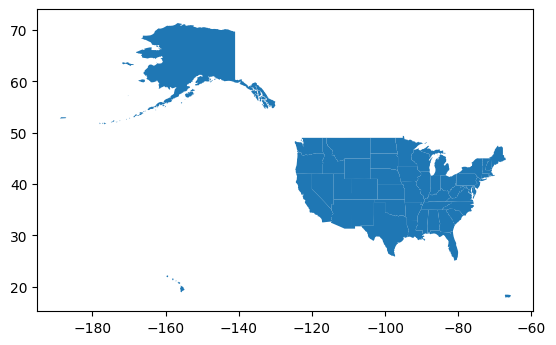

In [17]:
us_geojson.plot()

We'll read a second CSV file contains the lat, long location data of each US state:

In [22]:
us_states = pd.read_csv('./data/states.csv')
us_states.head()

state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California

## Pre-processing datasets

In this project, Geospatial Analysis using Folium, our end goal is to visualize the change in the condition of COVID-19 cases in US’s different states. For this, we will use the TimeSliderChoropleth plugin of Folium. This is a great plugin that helps visualize changes over time. It provides a slider on the top of the choropleth map, which you can slide to visualize the change in a quantity over a period of time.

For plotting the map using this plugin, we require two things – the GeoJSON of the place and the data. But here is a catch, it requires the data only in a specific format. The GeoJSON must be string serialized according to the area name, and the data must be given:

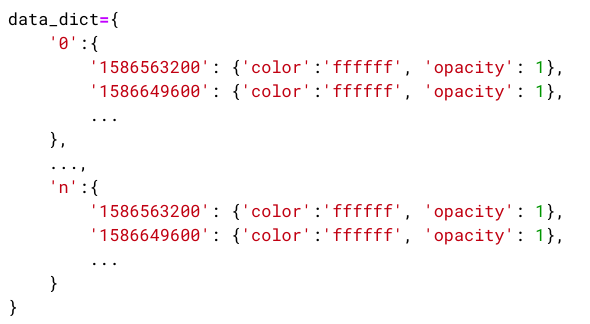

Take a look below – I have simplified the meaning of each term in the dictionary:

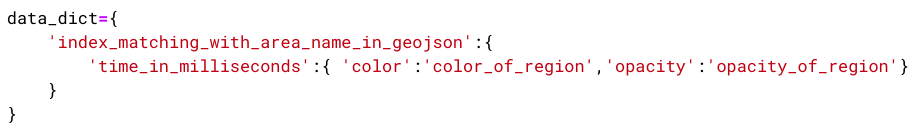

Now, you know that before plotting the map, we need to convert our data to this format. So, let’s start pre-processing the data.

First, we’ll pre-process the COVID-19 dataset and then we’ll move to the GeoJSON. Let’s start by checking if our dataset contains any null values:

In [23]:
us_covid.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

Great! We do not have any null values in our dataset. Next, let’s take a look at the data type of columns in this dataset:

In [24]:
us_covid.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

Everything seems to be correct but the `date` column is of type object. Let’s convert it to DateTime.

In [25]:
us_covid['date'] = pd.to_datetime(us_covid['date'])
us_covid.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

Now, we need to merge it to the covid data:

In [26]:
merged_df = pd.merge(us_covid, us_states, left_on='state', right_on='name')
merged_df.head()

date     state_x  fips  cases  deaths state_y   latitude   longitude  \
0 2020-01-21  Washington    53      1       0      WA  47.751074 -120.740139   
1 2020-01-22  Washington    53      1       0      WA  47.751074 -120.740139   
2 2020-01-23  Washington    53      1       0      WA  47.751074 -120.740139   
3 2020-01-24    Illinois    17      1       0      IL  40.633125  -89.398528   
4 2020-01-24  Washington    53      1       0      WA  47.751074 -120.740139   

         name  
0  Washington  
1  Washington  
2  Washington  
3    Illinois  
4  Washington

As we saw earlier, we must transform our data into a specific format. For that, we have to create an area-name-indexed dictionary. But I have found that TimeSliderChoropleth does not work well with area name indexes containing whitespaces. Therefore, we need to prepare a dictionary to label the states:

In [27]:
state_id_dict = us_geojson.set_index('name')['id'].to_dict()
state_id_dict

{'Alabama': '01',
 'Alaska': '02',
 'Arizona': '04',
 'Arkansas': '05',
 'California': '06',
 'Colorado': '08',
 'Connecticut': '09',
 'Delaware': '10',
 'District of Columbia': '11',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51',
 'Washington': '53',
 'West Virginia': '54',
 'Wisconsin': '55',
 'Wyoming': '56

In [28]:
# Creating IDs using the above dictionary
merged_df['state_id'] = merged_df['name'].map(state_id_dict)
merged_df.head()

date     state_x  fips  cases  deaths state_y   latitude   longitude  \
0 2020-01-21  Washington    53      1       0      WA  47.751074 -120.740139   
1 2020-01-22  Washington    53      1       0      WA  47.751074 -120.740139   
2 2020-01-23  Washington    53      1       0      WA  47.751074 -120.740139   
3 2020-01-24    Illinois    17      1       0      IL  40.633125  -89.398528   
4 2020-01-24  Washington    53      1       0      WA  47.751074 -120.740139   

         name state_id  
0  Washington       53  
1  Washington       53  
2  Washington       53  
3    Illinois       17  
4  Washington       53

In this project, we are visualizing the change in COVID-19 cases in different states of US. Therefore, the number of active cases is a better measure for this purpose. We can calculate the number of active cases in a state on a particular day by subtracting the number of deaths from the total number of confirmed cases:

In [29]:
merged_df['active_cases'] = merged_df['cases'] - merged_df['deaths']
merged_df.head()

date     state_x  fips  cases  deaths state_y   latitude   longitude  \
0 2020-01-21  Washington    53      1       0      WA  47.751074 -120.740139   
1 2020-01-22  Washington    53      1       0      WA  47.751074 -120.740139   
2 2020-01-23  Washington    53      1       0      WA  47.751074 -120.740139   
3 2020-01-24    Illinois    17      1       0      IL  40.633125  -89.398528   
4 2020-01-24  Washington    53      1       0      WA  47.751074 -120.740139   

         name state_id  active_cases  
0  Washington       53             1  
1  Washington       53             1  
2  Washington       53             1  
3    Illinois       17             1  
4  Washington       53             1

Now, let’s assign a color to each day of every state based on the total number of active cases. For this, I’ll divide the range between minimum and maximum active cases into 10 equal parts and assign each part a color:

In [31]:
import numpy as np

In [32]:
bins = np.linspace(min(merged_df['active_cases']), max(merged_df['active_cases']), 11)
bins

array([1.0000000e+00, 1.2064890e+06, 2.4129770e+06, 3.6194650e+06,
       4.8259530e+06, 6.0324410e+06, 7.2389290e+06, 8.4454170e+06,
       9.6519050e+06, 1.0858393e+07, 1.2064881e+07])

I am using the **red** color for marking the states with active COVID-19 cases and **green** color for those states which previously had active COVID-19 cases but do not have any on that particular day. Keep in mind the red color becomes darker with the increasing number of active COVID-19 cases:

In [33]:
# Coloring states and UTs with active COVID-19 cases
merged_df['color'] = pd.cut(merged_df['active_cases'], bins,
                            labels = ['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],
                            include_lowest=False)

# Update categories to include new value
if '#32CD32' not in merged_df['color'].cat.categories:
    merged_df['color'] = merged_df['color'].cat.add_categories('#32CD32')

# Replace NaN values
merged_df['color'] = merged_df['color'].fillna('#32CD32')
merged_df.head(10)

date     state_x  fips  cases  deaths state_y   latitude   longitude  \
0 2020-01-21  Washington    53      1       0      WA  47.751074 -120.740139   
1 2020-01-22  Washington    53      1       0      WA  47.751074 -120.740139   
2 2020-01-23  Washington    53      1       0      WA  47.751074 -120.740139   
3 2020-01-24    Illinois    17      1       0      IL  40.633125  -89.398528   
4 2020-01-24  Washington    53      1       0      WA  47.751074 -120.740139   
5 2020-01-25  California     6      1       0      CA  36.778261 -119.417932   
6 2020-01-25    Illinois    17      1       0      IL  40.633125  -89.398528   
7 2020-01-25  Washington    53      1       0      WA  47.751074 -120.740139   
8 2020-01-26     Arizona     4      1       0      AZ  34.048928 -111.093731   
9 2020-01-26  California     6      2       0      CA  36.778261 -119.417932   

         name state_id  active_cases    color  
0  Washington       53             1  #32CD32  
1  Washington       53             1  #32CD32  
2  Washington       53             1  #32CD32  
3    Illinois       17             1  #32CD32  
4  Washington       53             1  #32CD32  
5  California       06             1  #32CD32  
6    Illinois       17             1  #32CD32  
7  Washington       53             1  #32CD32  
8     Arizona       04             1  #32CD32  
9  California       06             2  #FFEBEB

We require only three columns of the dataset for further analysis. Therefore, I am dropping other columns and considering only Date, state_id and color column:

In [34]:
df_covid = merged_df[['date', 'state_id', 'color']]
df_covid.head()

date state_id    color
0 2020-01-21       53  #32CD32
1 2020-01-22       53  #32CD32
2 2020-01-23       53  #32CD32
3 2020-01-24       17  #32CD32
4 2020-01-24       53  #32CD32

Now, we have successfully color-coded all the states. But, you have missed something here. Can you guess it?

If you have read the previous sections carefully, then you know that our dataset contains data only about the states that have the COVID-19 cases. It does not include the information about states which never had any cases of COVID-19.

We can add this information by finding the set difference between the set of states having COVID-19 cases on a particular date and the set of total states. We'll represent states without any previous cases of COVID-19 cases using blue color:

In [364]:
len(state_id_dict)

52

In [35]:
for date in df_covid['date'].unique():
    diff = set([str(i) for i in range(len(state_id_dict))])-set(df_covid[df_covid['date']==date]['state_id'])
    for i in diff:
      df_covid = pd.concat([df_covid,pd.DataFrame([[date,'#0073CF',i]],columns=['date','color','state_id'])],ignore_index=True)
df_covid.sort_values('date', inplace=True)

I mentioned earlier that `TimeSliderChoropleth` takes time in milliseconds and also takes the whole dataset in the form of an area name indexed dictionary. That’s what we’ll do next:

In [36]:
df_covid['date'] = (df_covid['date'].astype(int)//10**9).astype('U10')
covid_dict = {}
for i in df_covid['state_id'].unique():
    covid_dict[i] = {}
    for j in df_covid[df_covid['state_id'] == i].set_index(['state_id']).values:   
        covid_dict[i][j[0]] = {'color':j[1],'opacity':0.7}

list(covid_dict.items())[10]

('16',
 {'1579564800': {'color': '#0073CF', 'opacity': 0.7},
  '1579651200': {'color': '#0073CF', 'opacity': 0.7},
  '1579737600': {'color': '#0073CF', 'opacity': 0.7},
  '1579824000': {'color': '#0073CF', 'opacity': 0.7},
  '1579910400': {'color': '#0073CF', 'opacity': 0.7},
  '1579996800': {'color': '#0073CF', 'opacity': 0.7},
  '1580083200': {'color': '#0073CF', 'opacity': 0.7},
  '1580169600': {'color': '#0073CF', 'opacity': 0.7},
  '1580256000': {'color': '#0073CF', 'opacity': 0.7},
  '1580342400': {'color': '#0073CF', 'opacity': 0.7},
  '1580428800': {'color': '#0073CF', 'opacity': 0.7},
  '1580515200': {'color': '#0073CF', 'opacity': 0.7},
  '1580601600': {'color': '#0073CF', 'opacity': 0.7},
  '1580688000': {'color': '#0073CF', 'opacity': 0.7},
  '1580774400': {'color': '#0073CF', 'opacity': 0.7},
  '1580860800': {'color': '#0073CF', 'opacity': 0.7},
  '1580947200': {'color': '#0073CF', 'opacity': 0.7},
  '1581033600': {'color': '#0073CF', 'opacity': 0.7},
  '1581120000': {'col

Finally, we have successfully pre-processed the COVID-19 virus dataset. Now, it is time to pre-process the GeoJSON. We don’t have to do much here. Similar to what we did with the previous dataset, we just need to label encode the column containing states names:

In [37]:
us_geojson['state_id'] = us_geojson['name'].map(state_id_dict)
us_geojson.drop(columns='name', inplace=True)
us_geojson.head()

id  density                                           geometry state_id
0  01   94.650  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...       01
1  02    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...       02
2  04   57.050  POLYGON ((-109.0425 37.00026, -109.04798 31.33...       04
3  05   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...       05
4  06  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...       06

Hurray! We have pre-processed both the datasets. Now, let’s move to the next section and plot these datasets and see the results.

## Plotting changes in COVID-19 cases in India using TimeSliderChoropleth plugin

Your wait is finally over! The process of plotting a map using this plugin is very easy and requires only three steps:

- Import the plugin
- Create a base map
- Add the plugin to map
  
So, let’s import the TimeSliderChoropleth plugin.

In [38]:
from folium.plugins import TimeSliderChoropleth

Now, let’s create a basemap of US. I have used CartoDB positron tileset here because it a very clean tileset and the colors of states will be in contrast to it:

In [39]:
fig6 = Figure(height=500, width=1000)
m6 = folium.Map([38, -106], tiles='cartodbpositron', zoom_start=3)
fig6.add_child(m6)

Let’s add our plugin to the map and see the results:

In [40]:
g = TimeSliderChoropleth(
    us_geojson.set_index('state_id').to_json(),
    styledict = covid_dict
).add_to(m6)

m6

### For Egypt

In [42]:
eg_geojson=geopandas.read_file('./data/eg.json')
eg_geojson.head()

source     id              name  \
0  https://simplemaps.com  EGSIN      Shamal Sina'   
1  https://simplemaps.com  EGASN             Aswan   
2  https://simplemaps.com   EGBA  Al Bahr al Ahmar   
3  https://simplemaps.com   EGMT            Matruh   
4  https://simplemaps.com  EGWAD  Al Wadi at Jadid   

                                            geometry  
0  MULTIPOLYGON (((34.88551 29.4895, 34.46816 29....  
1  POLYGON ((31.31439 22.10227, 31.31419 22.10268...  
2  MULTIPOLYGON (((31.496 21.99966, 31.49615 22.0...  
3  POLYGON ((29.59807 31.00951, 29.59807 31.00875...  
4  POLYGON ((32.65385 25.1457, 32.73519 25.10309,...

<Axes: >

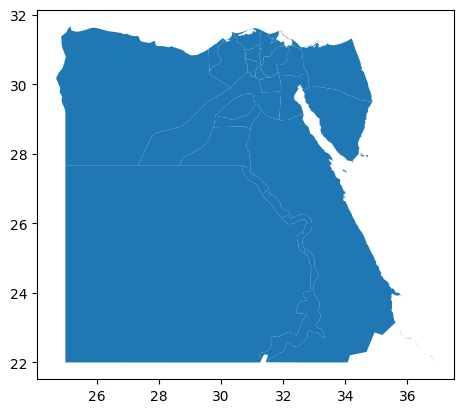

In [43]:
eg_geojson.plot()

# Folium Project #2: Visualizing Bus Traffic in New York City

## Understanding the Problem Statement

To visualize the traffic due to buses in New York City throughout the day.

## Understanding the Data

For this project, I’m leveraging Python Folium with the New York City Bus Data sourced [here](https://www.kaggle.com/datasets/stoney71/new-york-city-transport-statistics). The dataset provides bus locations every 10 minutes, alongside departure and arrival times, next stops, and time to destination. Recorded between June and September 2017, it offers latitude and longitude details.

Let’s take a look at our dataset for Geospatial Analysis using Folium:

In [44]:
# Importing Data
df = pd.read_csv('./data/mta_1706.csv', on_bad_lines = 'skip')
df.head()

RecordedAtTime  DirectionRef PublishedLineName  \
0  2017-06-01 00:03:34             0                B8   
1  2017-06-01 00:03:43             1               S61   
2  2017-06-01 00:03:49             0              Bx10   
3  2017-06-01 00:03:31             0                Q5   
4  2017-06-01 00:03:22             1               Bx1   

                  OriginName  OriginLat  OriginLong  \
0                 4 AV/95 ST  40.616104  -74.031143   
1  ST GEORGE FERRY/S61 & S91  40.643169  -74.073494   
2     E 206 ST/BAINBRIDGE AV  40.875008  -73.880142   
3           TEARDROP/LAYOVER  40.701748  -73.802399   
4      RIVERDALE AV/W 231 ST  40.881187  -73.909340   

                   DestinationName  DestinationLat  DestinationLong  \
0          BROWNSVILLE ROCKAWAY AV       40.656048       -73.907379   
1                S I MALL YUKON AV       40.575935       -74.167686   
2                 RIVERDALE 263 ST       40.912376       -73.902534   
3    ROSEDALE LIRR STA via MERRICK       40.666012       -73.735939   
4  MOTT HAVEN 136 ST via CONCOURSE       40.809654       -73.928360   

  VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude  \
0   NYCT_430                 40.635170                 -73.960803   
1  NYCT_8263                 40.590802                 -74.158340   
2  NYCT_4223                 40.886010                 -73.912647   
3  NYCT_8422                 40.668002                 -73.729348   
4  NYCT_4710                 40.868134                 -73.893032   

             NextStopPointName ArrivalProximityText  DistanceFromStop  \
0            FOSTER AV/E 18 ST          approaching              76.0   
1      MERRYMOUNT ST/TRAVIS AV          approaching              62.0   
2  HENRY HUDSON PKY E/W 235 ST              at stop               5.0   
3     HOOK CREEK BL/SUNRISE HY        < 1 stop away             267.0   
4     GRAND CONCOURSE/E 196 ST              at stop              11.0   

   ExpectedArrivalTime ScheduledArrivalTime  
0  2017-06-01 00:03:59             24:06:14  
1  2017-06-01 00:03:56             23:58:02  
2  2017-06-01 00:03:56             24:00:53  
3  2017-06-01 00:04:03             24:03:00  
4  2017-06-01 00:03:56             23:59:38

This is the dataset for June 2017 only. It contains 17 columns and more than 6.7 million rows. We’ll use this dataset for our analysis but first, we need to pre-process what we have.

## Pre-processing the Dataset
In this project, Geospatial Analysis using Folium, we’ll visualize the change in road traffic conditions in New York City due to buses throughout the day. We can do this using a heatmap. Heatmaps are a great tool for visualizing the density of a quantity in an area through the change in intensity of a color. But we want to visualize the traffic over time.

Do you know how can we do this?

We can do this by using the [HeatMapWithTime](https://python-visualization.github.io/folium/latest/reference.html#module-folium.plugins) plugin of Folium Python. It is a great plugin that helps in creating heatmaps for a period of time. It creates an animation of heatmaps that we can pause, play, loop and also play at different speeds. So, let’s pre-process our data.

Here, we’ll only take data for one day of the month – 1 June 2017. We are doing this because we want to visualize the traffic throughout a day not throughout a month:

In [45]:
# Getting data for 1 June 2017
df = df[df['RecordedAtTime'].str.split(' ').apply(lambda x:x[0]=='2017-06-01')]
df.shape

(248877, 17)

Our dataset contains 17 columns and more than 0.24 million rows. Also for plotting heatmaps, we only need information such as data recording time, latitude, and longitude of buses and vehicle reference numbers for selecting a vehicle. Therefore, I am dropping other columns of the dataset:

In [46]:
df = df[['RecordedAtTime','VehicleRef','VehicleLocation.Latitude','VehicleLocation.Longitude']]
df.head()

RecordedAtTime VehicleRef  VehicleLocation.Latitude  \
0  2017-06-01 00:03:34   NYCT_430                 40.635170   
1  2017-06-01 00:03:43  NYCT_8263                 40.590802   
2  2017-06-01 00:03:49  NYCT_4223                 40.886010   
3  2017-06-01 00:03:31  NYCT_8422                 40.668002   
4  2017-06-01 00:03:22  NYCT_4710                 40.868134   

   VehicleLocation.Longitude  
0                 -73.960803  
1                 -74.158340  
2                 -73.912647  
3                 -73.729348  
4                 -73.893032

Now, let’s check if our dataset contains any redundant rows because it can affect the results of our analysis:

In [47]:
df.duplicated().value_counts()

False    241642
True       7235
Name: count, dtype: int64

We can see that our dataset contains many redundant rows. So let’s drop these duplicate rows and keep only the first one:

In [48]:
df = df.drop_duplicates()

Next, let’s check if there are any null values present in our dataset:

In [49]:
df.isnull().sum()

RecordedAtTime               0
VehicleRef                   0
VehicleLocation.Latitude     0
VehicleLocation.Longitude    0
dtype: int64

Great! We do not have any null values. Now, let’s add another column to our dataset containing the hour because we want to generate a heatmap for every hour.

In [50]:
# Converting column to datetime
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'],format='%Y-%m-%d %H:%M:%S')
# Creating hour column
df['hour'] = df['RecordedAtTime'].apply(lambda x: x.hour+1)
df.head()

RecordedAtTime VehicleRef  VehicleLocation.Latitude  \
0 2017-06-01 00:03:34   NYCT_430                 40.635170   
1 2017-06-01 00:03:43  NYCT_8263                 40.590802   
2 2017-06-01 00:03:49  NYCT_4223                 40.886010   
3 2017-06-01 00:03:31  NYCT_8422                 40.668002   
4 2017-06-01 00:03:22  NYCT_4710                 40.868134   

   VehicleLocation.Longitude  hour  
0                 -73.960803     1  
1                 -74.158340     1  
2                 -73.912647     1  
3                 -73.729348     1  
4                 -73.893032     1

There is a problem here – not all buses have their locations recorded at the same point in time. We can tackle this problem by taking the last recorded position of every bus in an hour. For this, we can first find the last location recorded time of a bus in an hour, and then we can find the latitudes and longitudes for these timestamps. So, let’s find the last recorded time for every bus in an hour

In [51]:
df2 = pd.DataFrame(df.groupby(['hour','VehicleRef'])['RecordedAtTime'].max())
df2.reset_index(inplace=True)
df2.head()

hour VehicleRef      RecordedAtTime
0     1  NYCT_1206 2017-06-01 00:52:59
1     1  NYCT_1208 2017-06-01 00:03:49
2     1  NYCT_1212 2017-06-01 00:53:10
3     1  NYCT_1213 2017-06-01 00:53:18
4     1  NYCT_1218 2017-06-01 00:53:18

We have the last recorded time for every bus in an hour. Let’s find the location of buses for these timestamps. We can do this by joining df2 and df together on hour, VehicleRef and RecordedAtTime columns.

In [52]:
df3 = pd.merge(df2, df, left_on=['hour','VehicleRef','RecordedAtTime'], right_on=['hour','VehicleRef','RecordedAtTime'])
df3.head()

hour VehicleRef      RecordedAtTime  VehicleLocation.Latitude  \
0     1  NYCT_1206 2017-06-01 00:52:59                 40.813268   
1     1  NYCT_1208 2017-06-01 00:03:49                 40.895555   
2     1  NYCT_1212 2017-06-01 00:53:10                 40.876857   
3     1  NYCT_1213 2017-06-01 00:53:18                 40.888707   
4     1  NYCT_1218 2017-06-01 00:53:18                 40.862368   

   VehicleLocation.Longitude  
0                 -73.930409  
1                 -73.896672  
2                 -73.902408  
3                 -73.859971  
4                 -73.913939

There is just one more thing left to do before we move onto the next section. The HeatMapWithTime plugin takes the data in a specific format. It takes the latitudes and longitudes in the form of nested arrays:

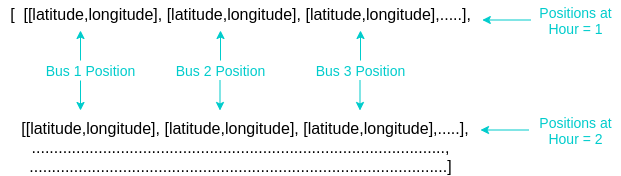

Let’s convert the position of buses into this format:

In [53]:
lat_long_list = []
for i in range(1, 25):
    temp = []
    for index, instance in df3[df3['hour'] == i].iterrows():
        temp.append([instance['VehicleLocation.Latitude'],instance['VehicleLocation.Longitude']])
    lat_long_list.append(temp)

Hurray! We have successfully pre-processed our dataset. Now, it is time to move to the next section of the tutorial where we’ll visualize the bus traffic in New York City.

## Visualizing Bus Traffic through the HeatMapWithTime Plugin

Finally, we have arrived at the much-awaited section of the project. In this, we’ll visualize the bus traffic in New York City. Similar to COVID-19 project’s TimeSliderChoropleth plugin, plotting through HeatMapWithTime is a three-step process:

- Import the plugin
- Create a base map
- Add the plugin to map
  
So, let’s import the plugin and create our base map:

In [54]:
from folium.plugins import HeatMapWithTime

fig7 = Figure(width=1000, height=500)
m7 = folium.Map(location=[40.712776, -74.005974], zoom_start=10)
fig7.add_child(m7)

Here, I haven’t mentioned the tileset therefore, it will be `OpenStreetMap`. Now, let’s add our plugin to this Folium map:

In [55]:
HeatMapWithTime(lat_long_list, radius=5, auto_play=True, position='bottomright').add_to(m7)
m7

We can see that after 10:00 PM, the traffic starts to reduce in New York City but the city again becomes crowded at 8:00 AM. Also, the buses run 24/7. Manhattan is the most crowded borough of New York followed by Brooklyn. Staten Island is the borough with the least traffic in New York.

You can always save your maps by using the `save()` function:

In [56]:
m7.save('m7.html')

# Done!